<a href="https://colab.research.google.com/github/abhayjha800/time_series_forecasting/blob/main/climate_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly
import plotly.express as px
import plotly.graph_objects as go
import cufflinks as cf
import plotly.io as pio
import plotly.subplots as sp

READ THE TRAINING DATA FROM KAGGLE

In [149]:
df = pd.read_csv('/content/DailyDelhiClimateTrain.csv', parse_dates=['date'], index_col ='date')

In [150]:
df.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [151]:
df.tail()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762
2016-12-31,15.052632,87.000000,7.325000,1016.100000
2017-01-01,10.000000,100.000000,0.000000,1016.000000


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
dtypes: float64(4)
memory usage: 57.1 KB


In [153]:
df.isnull().sum()

,0
meantemp,0
humidity,0
wind_speed,0
meanpressure,0


NO NULL VALUES IN THE DATASET

In [154]:
df.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


CREATING NEW FEATURES FROM DATE(INDEX) FOR EDA

In [155]:
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['dayofweek'] = df.index.dayofweek
df['date'] = df.index.date

In [156]:
df.head()

,meantemp,humidity,wind_speed,meanpressure,year,month,day,dayofweek,date
date,,,,,,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667,2013,1,1,1,2013-01-01
2013-01-02,7.400000,92.000000,2.980000,1017.800000,2013,1,2,2,2013-01-02
2013-01-03,7.166667,87.000000,4.633333,1018.666667,2013,1,3,3,2013-01-03
2013-01-04,8.666667,71.333333,1.233333,1017.166667,2013,1,4,4,2013-01-04
2013-01-05,6.000000,86.833333,3.700000,1016.500000,2013,1,5,5,2013-01-05


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
 4   year          1462 non-null   int32  
 5   month         1462 non-null   int32  
 6   day           1462 non-null   int32  
 7   dayofweek     1462 non-null   int32  
 8   date          1462 non-null   object 
dtypes: float64(4), int32(4), object(1)
memory usage: 91.4+ KB


In [158]:
meantemp_fig = px.line(df, x=df.index, y='meantemp', title='Mean Temperature Over Time')
meantemp_fig.update_layout(template="plotly_dark", xaxis_title='Date', yaxis_title='Mean Temperature')
meantemp_fig.show()

In [159]:
humidity_fig = px.line(df, x=df.index, y='humidity', title='humidity Over Time')
humidity_fig.update_layout(template="plotly_dark", xaxis_title='Date')
humidity_fig.show()

In [160]:
wind_speed_fig = px.line(df, x=df.index, y='wind_speed', title='wind speed Over Time')
wind_speed_fig.update_layout(template="plotly_dark", xaxis_title='Date')
wind_speed_fig.show()

In [161]:
meanpressure_fig = px.line(df, x=df.index, y='meanpressure', title='meanpressure Over Time')
meanpressure_fig.update_layout(template="plotly_dark", xaxis_title='Date')
meanpressure_fig.show()

PLOTTING FEATURES OVER MONTH

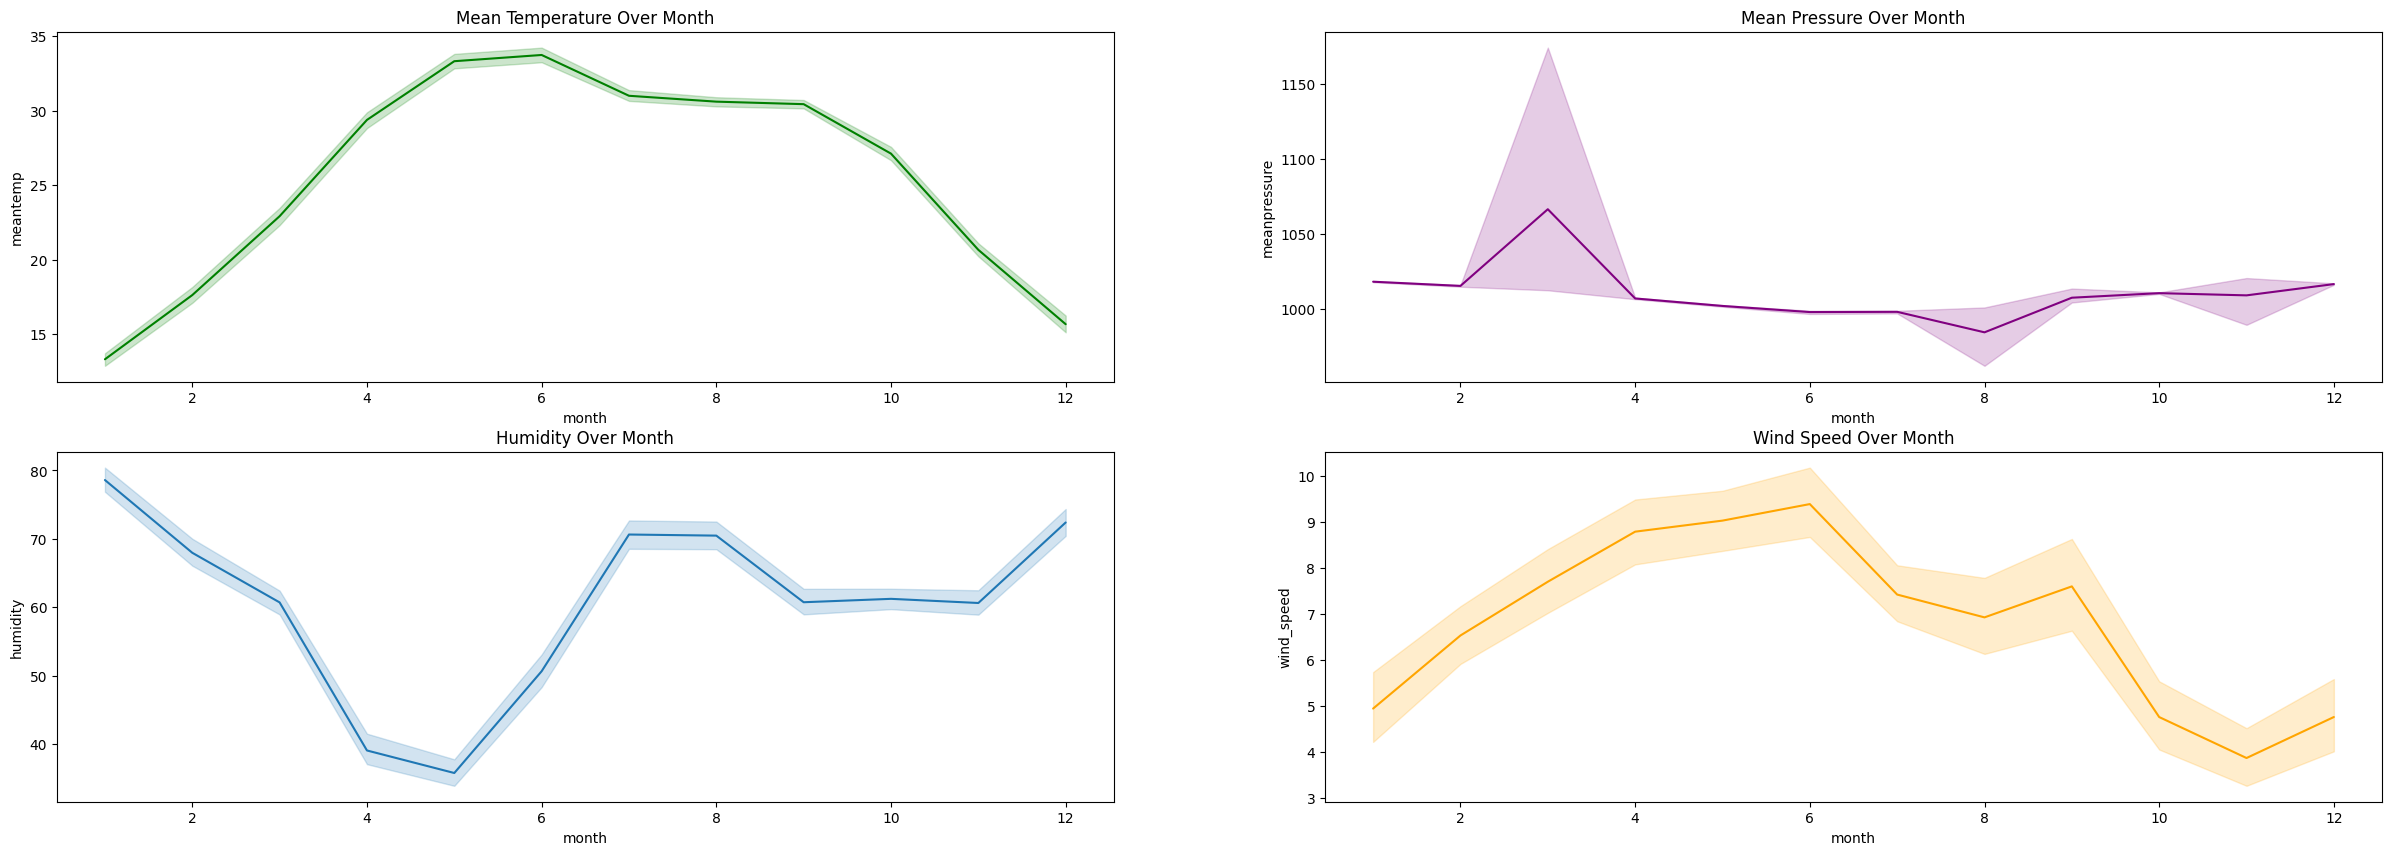

In [162]:
fig, axes = plt.subplots(2, 2, figsize=(30, 10))
sns.set_style('darkgrid')
plt.style.use('dark_background')


# Plot
sns.lineplot(data=df, x='month', y='meantemp', color='green',ax=axes[0][0]).set_title('Mean Temperature Over Month')
sns.lineplot(data=df, x='month', y='humidity', ax=axes[1][0]).set_title('Humidity Over Month')
sns.lineplot(data=df, x='month', y='wind_speed',color='orange', ax=axes[1][1]).set_title('Wind Speed Over Month')
sns.lineplot(data=df, x='month', y='meanpressure', color='purple', ax=axes[0][1]).set_title('Mean Pressure Over Month')

plt.show()


PLOTTING TEMPERATURE OVER THE MONTHS BY YEAR


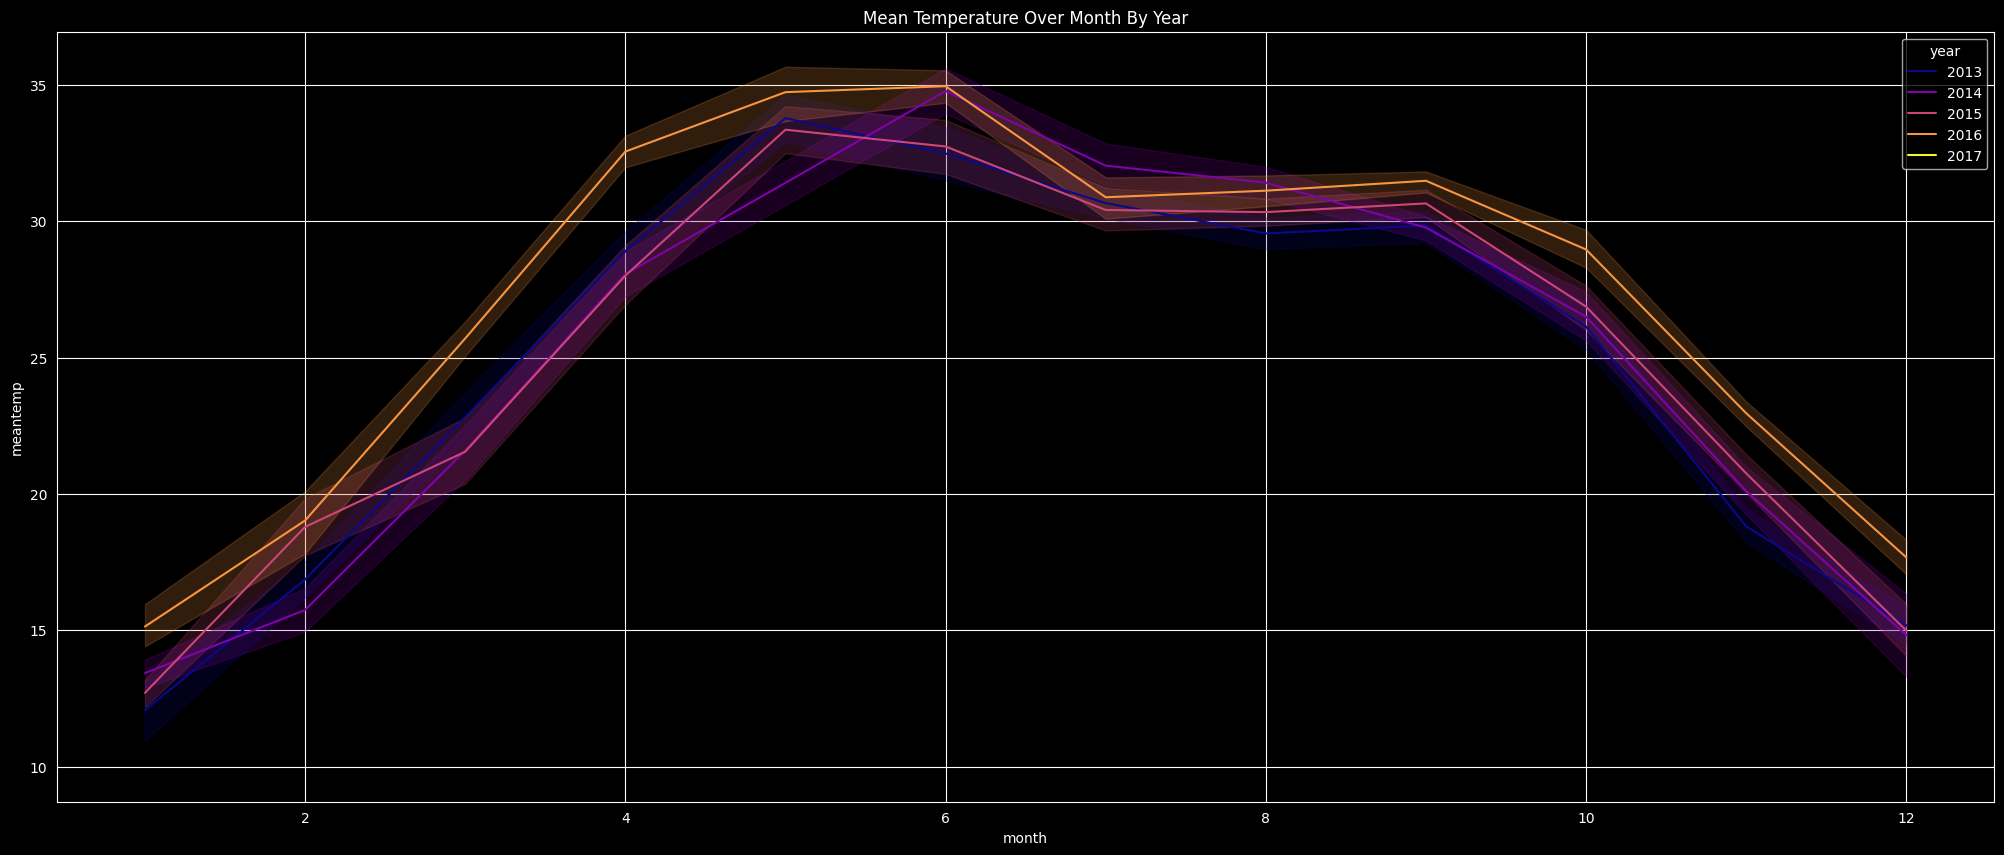

In [163]:
plt.figure(figsize=(25, 10))



sns.lineplot(data=df, x='month', y='meantemp', hue='year', palette='plasma').set_title('Mean Temperature Over Month By Year')
plt.show()

PLOTTING SEASONAL DECOMPOSITIONS

In [164]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [165]:
#performing seasonal decomposition
result = seasonal_decompose(df['meantemp'], model='additive', period=365)

fig =sp.make_subplots(rows=4,cols=1, shared_xaxes=True, subplot_titles=['Observed', 'Trend', 'Seasonality', 'Residual'])

fig.add_trace(go.Scatter(x=df.index, y=result.observed, mode='lines', name='Observed') , row=1, col=1)
fig.add_trace(go.Scatter(x=df.index, y=result.trend, mode='lines', name='Trend') , row=2, col=1)
fig.add_trace(go.Scatter(x=df.index, y=result.seasonal, mode='lines', name='Seasonality') , row=3, col=1)
fig.add_trace(go.Scatter(x=df.index, y=result.resid, mode='markers', name='Residual') , row=4, col=1)
fig.update_layout(template="plotly_dark", height=800, title = 'Seasonal decomposition of Mean Temperature')
fig.show()

CORRELATION BETWEEN THE FEATURES

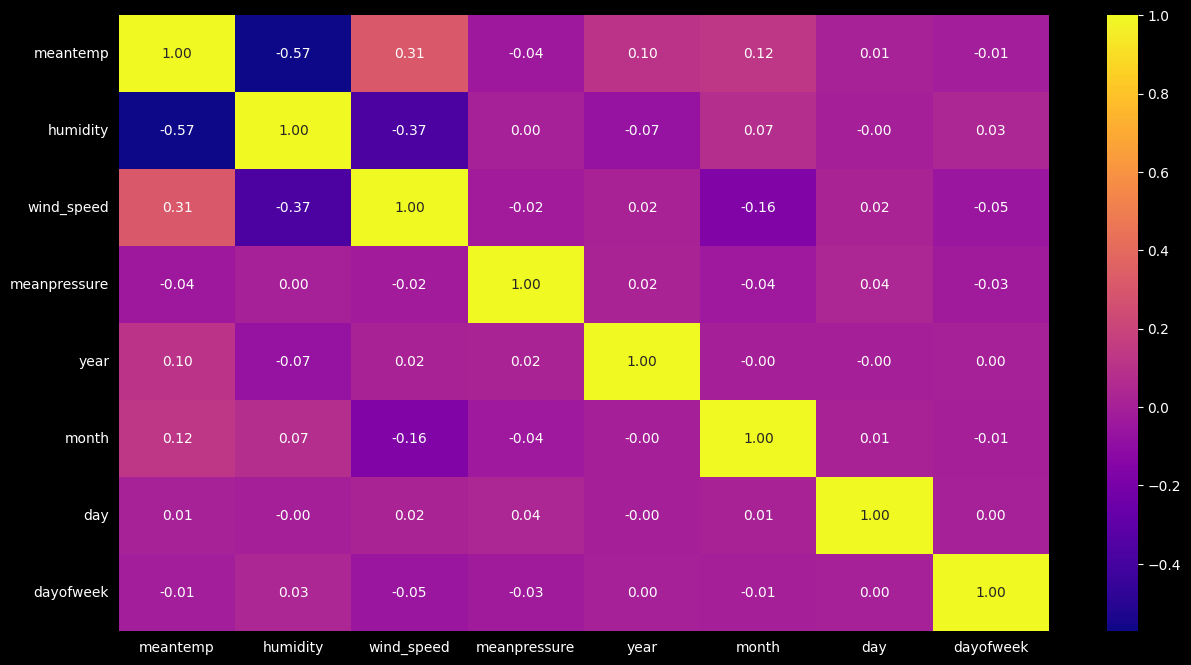

In [166]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.select_dtypes('number').corr(), annot=True, cmap='plasma', fmt='.2f')
plt.show()


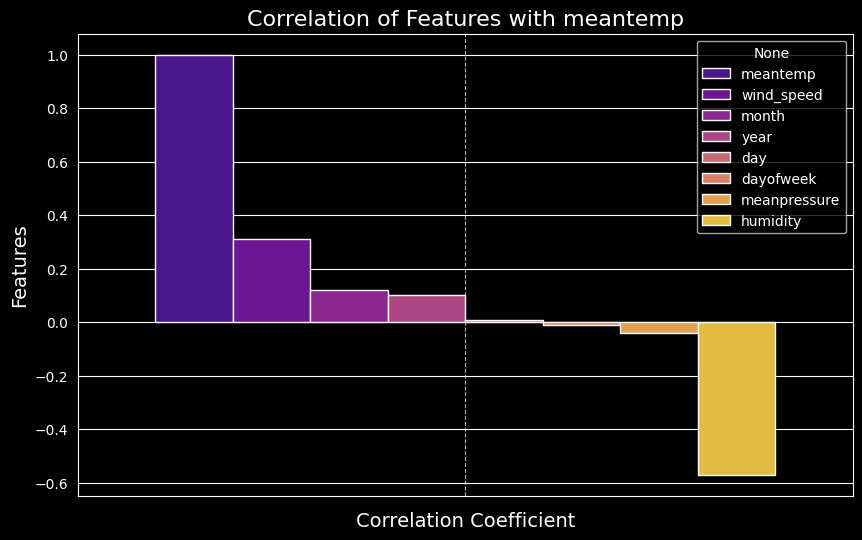

In [167]:
# Specify the target attribute
target_attribute = 'meantemp'

correlations = round(df.select_dtypes('number').corr(), 2)[target_attribute]

# Sort correlations (retain sign)
sorted_correlations = correlations.sort_values(ascending=False)

# Plot the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(hue=sorted_correlations.index, y=sorted_correlations.values,  palette="plasma")
plt.title(f'Correlation of Features with {target_attribute}', fontsize=16)
plt.xlabel('Correlation Coefficient', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

FEATURE SELECTION

In [168]:
df1=df.copy()
df1

,meantemp,humidity,wind_speed,meanpressure,year,month,day,dayofweek,date
date,,,,,,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667,2013,1,1,1,2013-01-01
2013-01-02,7.400000,92.000000,2.980000,1017.800000,2013,1,2,2,2013-01-02
2013-01-03,7.166667,87.000000,4.633333,1018.666667,2013,1,3,3,2013-01-03
2013-01-04,8.666667,71.333333,1.233333,1017.166667,2013,1,4,4,2013-01-04
2013-01-05,6.000000,86.833333,3.700000,1016.500000,2013,1,5,5,2013-01-05
...,...,...,...,...,...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217,2016,12,28,2,2016-12-28
2016-12-29,15.238095,87.857143,6.000000,1016.904762,2016,12,29,3,2016-12-29
2016-12-30,14.095238,89.666667,6.266667,1017.904762,2016,12,30,4,2016-12-30


In [169]:
df1=df1[['meantemp','humidity','wind_speed']]
df1.head()

,meantemp,humidity,wind_speed
date,,,
2013-01-01,10.000000,84.500000,0.000000
2013-01-02,7.400000,92.000000,2.980000
2013-01-03,7.166667,87.000000,4.633333
2013-01-04,8.666667,71.333333,1.233333
2013-01-05,6.000000,86.833333,3.700000


In [170]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   meantemp    1462 non-null   float64
 1   humidity    1462 non-null   float64
 2   wind_speed  1462 non-null   float64
dtypes: float64(3)
memory usage: 45.7 KB


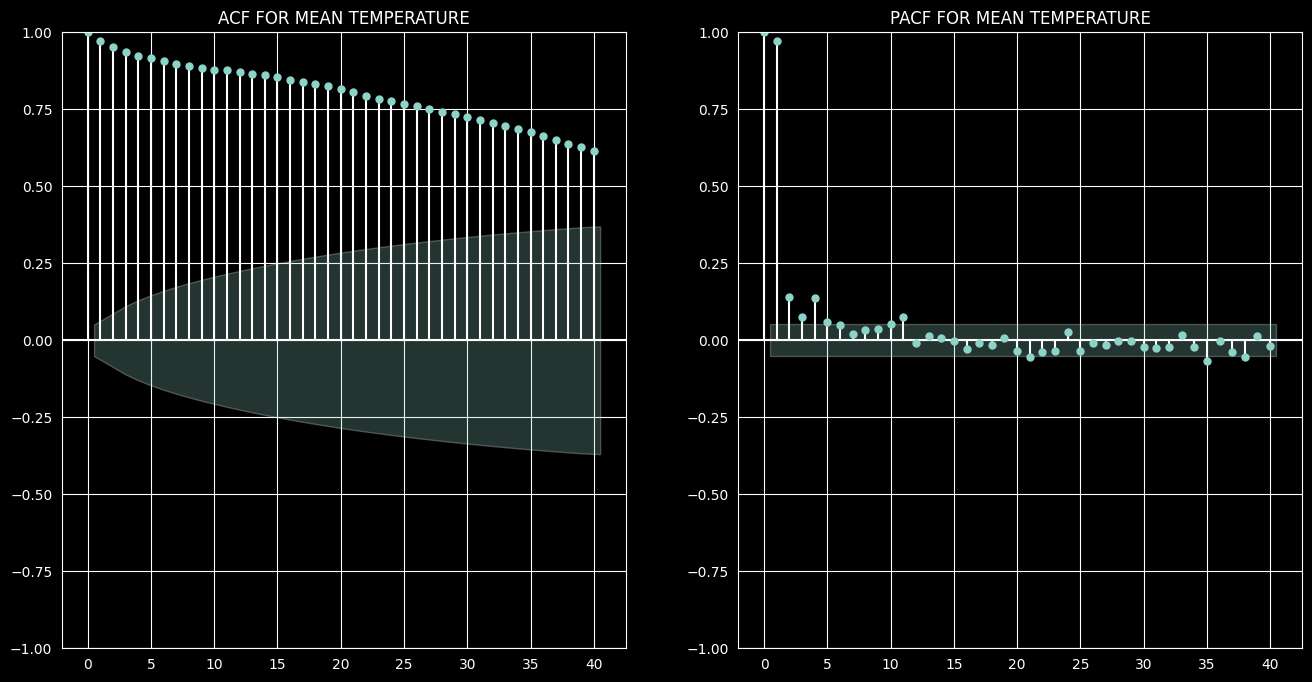

In [171]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.style.use('dark_background')
fig, axes = plt.subplots(1,2, figsize=(16,8))
plot_acf(df1['meantemp'], ax=axes[0], lags=40, title='ACF FOR MEAN TEMPERATURE');
plot_pacf(df1['meantemp'], ax=axes[1], lags=40, title='PACF FOR MEAN TEMPERATURE');
plt.show()

CHECK FOR STATIONARITY  ADF AND KPSS TESTS:

In [172]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss

def check_stationarity(series):
  print(f'\n---------CHECK STATIONARITY FOR :{series.name}-----------\n')

  #adf
  adf_test = adfuller(series.values)
  print('ADF TEST:\n')
  print('ADF STATISTICS: %f'% adf_test[0])
  print('p-value: %f' % adf_test[1])
  print('critical values:')
  for key, value in adf_test[4].items():
    print('\t%s: %.3f' % (key, value))

  if (adf_test[1] <= 0.05) & (adf_test[4]['5%'] >= adf_test[0]):
    print('The series is stationary (ADF TEST)')
  else:
    print('The series is non-stationary (ADF TEST)')

  print('\n'+'-'*50 + '\n')

  #kpss
  kpss_test = kpss(series.values, regression='c', nlags='auto')
  print('KPSS TEST:\n')
  print('KPSS STATISTICS: %f'% kpss_test[0])
  print('p-value: %f' % kpss_test[1])
  print('critical values:')
  for key, value in kpss_test[3].items():
    print('\t%s: %.3f' % (key, value))

  if kpss_test[1]> 0.05:
    print('The series is stationary (KPSS TEST)')
  else:
    print('The series is non-stationary (KPSS TEST)')

In [173]:
check_stationarity(df1['meantemp'])
check_stationarity(df1['humidity'])
check_stationarity(df1['wind_speed'])


---------CHECK STATIONARITY FOR :meantemp-----------

ADF TEST:

ADF STATISTICS: -2.021069
p-value: 0.277412
critical values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
The series is non-stationary (ADF TEST)

--------------------------------------------------

KPSS TEST:

KPSS STATISTICS: 0.187864
p-value: 0.100000
critical values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
The series is stationary (KPSS TEST)

---------CHECK STATIONARITY FOR :humidity-----------

ADF TEST:

ADF STATISTICS: -3.675577
p-value: 0.004470
critical values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
The series is stationary (ADF TEST)

--------------------------------------------------

KPSS TEST:

KPSS STATISTICS: 0.091737
p-value: 0.100000
critical values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
The series is stationary (KPSS TEST)

---------CHECK STATIONARITY FOR :wind_speed-----------

ADF TEST:

ADF STATISTICS: -3.838097
p-value: 0.002541
critical values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
The series

<ipython-input-172-48b92eb66e75>:24: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


<ipython-input-172-48b92eb66e75>:24: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


<ipython-input-172-48b92eb66e75>:24: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




MEANTEMP HAS NON STATIONARITY
APPLY DIFFERENCING TO MAKE THE TIME SERIES STATIONARY

In [174]:
df1['meantemp_diff'] = df1['meantemp'].diff().fillna(0)
print('\n--------------------- after differencing--------------------------\n')
check_stationarity(df1['meantemp_diff'])


--------------------- after differencing--------------------------


---------CHECK STATIONARITY FOR :meantemp_diff-----------

ADF TEST:

ADF STATISTICS: -16.294070
p-value: 0.000000
critical values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
The series is stationary (ADF TEST)

--------------------------------------------------

KPSS TEST:

KPSS STATISTICS: 0.189493
p-value: 0.100000
critical values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
The series is stationary (KPSS TEST)


<ipython-input-172-48b92eb66e75>:24: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




PLOTTIG ACF AND PACF AFTER MAKING TIME SERIES STATIONARY

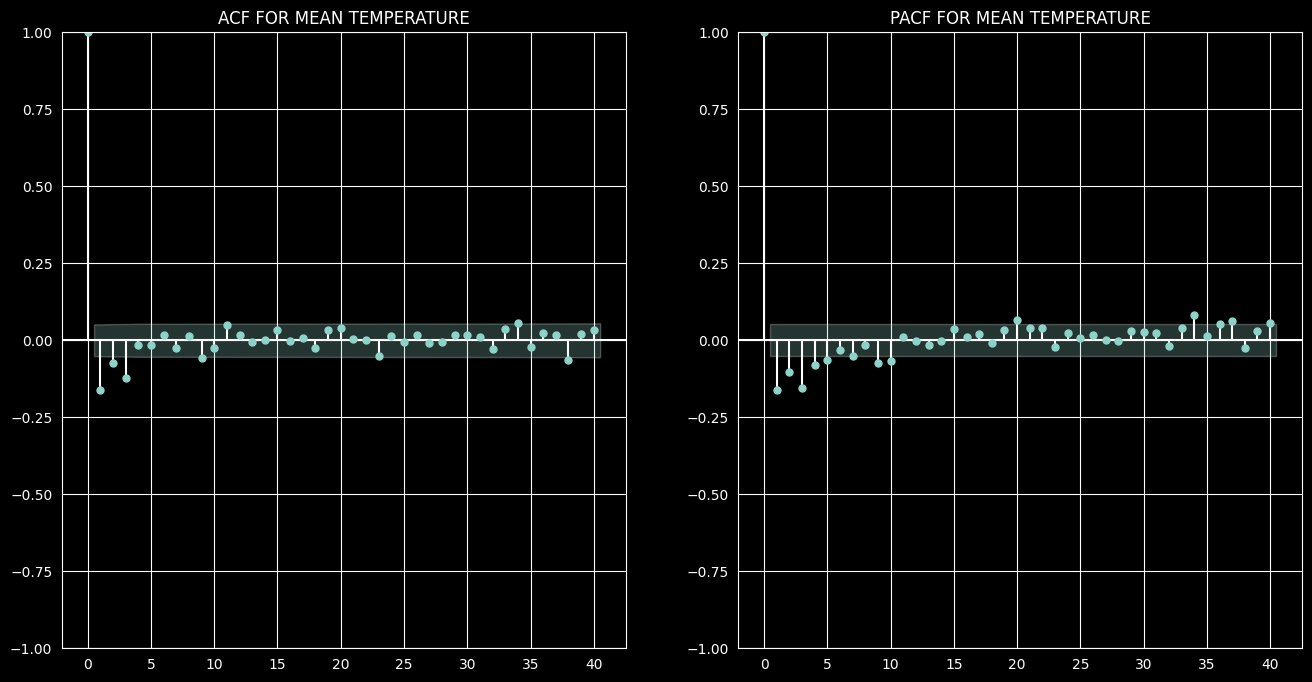

In [175]:
plt.style.use('dark_background')
fig, axes = plt.subplots(1,2, figsize=(16,8))
plot_acf(df1['meantemp_diff'],ax=axes[0], lags=40, title='ACF FOR MEAN TEMPERATURE');
plot_pacf(df1['meantemp_diff'],ax=axes[1], lags=40, title='PACF FOR MEAN TEMPERATURE');

In [176]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   meantemp       1462 non-null   float64
 1   humidity       1462 non-null   float64
 2   wind_speed     1462 non-null   float64
 3   meantemp_diff  1462 non-null   float64
dtypes: float64(4)
memory usage: 57.1 KB


ARIMA-SARIMA MODEL WITH MONTHLY DATA

In [177]:
monthly_df = df1.resample('ME').mean()
monthly_df.head()

,meantemp,humidity,wind_speed,meantemp_diff
date,,,,
2013-01-31,12.074770,73.028802,4.833913,0.200000
2013-02-28,16.867560,71.938563,7.474090,0.115306
2013-03-31,22.814209,57.417243,8.757270,0.121659
2013-04-30,28.895119,34.612103,8.046385,0.264762
2013-05-31,33.776767,28.938249,8.943452,0.080069


In [178]:
#SPLIT THE DATA INTO TRAINING AND TESTING SETS
train_size = int(len(monthly_df) * 0.8)
train_data = monthly_df[:train_size]
test_data = monthly_df[train_size:]

Test MAPE: 0.339
Test RMSE: 8.034
Test R2: -0.077


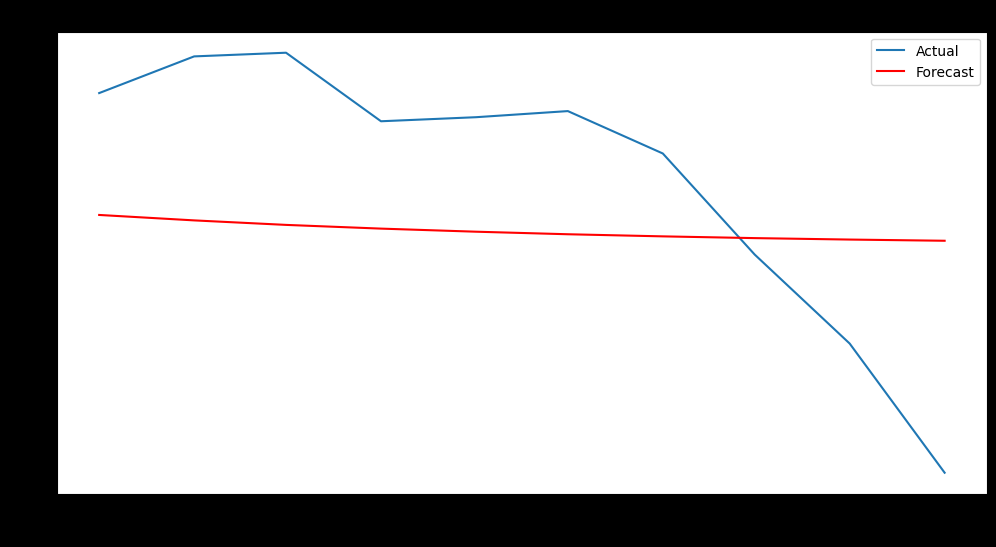

In [179]:
# ARIMA

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import math

# Fit the ARIMA model
arima_model = ARIMA(train_data['meantemp'], order=(1,0,0))  # ARIMA(p,d,q)
arima_model_fit = arima_model.fit()

# Make predictions
arima_pred_m = arima_model_fit.forecast(steps=len(test_data))

# Calculate error
mape_arima_monthly = mean_absolute_percentage_error(test_data['meantemp'], arima_pred_m)
rmse_arima_monthly = math.sqrt(mean_squared_error(test_data['meantemp'], arima_pred_m))
r2_arima_monthly = r2_score(test_data['meantemp'], arima_pred_m)
print('Test MAPE: %.3f' % mape_arima_monthly)
print('Test RMSE: %.3f' % rmse_arima_monthly)
print('Test R2: %.3f' % r2_arima_monthly)


# Plot the results
plt.figure(figsize=(12, 6))
plt.style.use('default')
plt.plot(test_data.index, test_data['meantemp'], label='Actual')
plt.plot(test_data.index, arima_pred_m, color='red', label='Forecast')
plt.xlabel('Date')
plt.ylabel('Difference in Meantemp')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



Test MAPE: 0.080
Test RMSE: 1.941
Test R2: 0.937


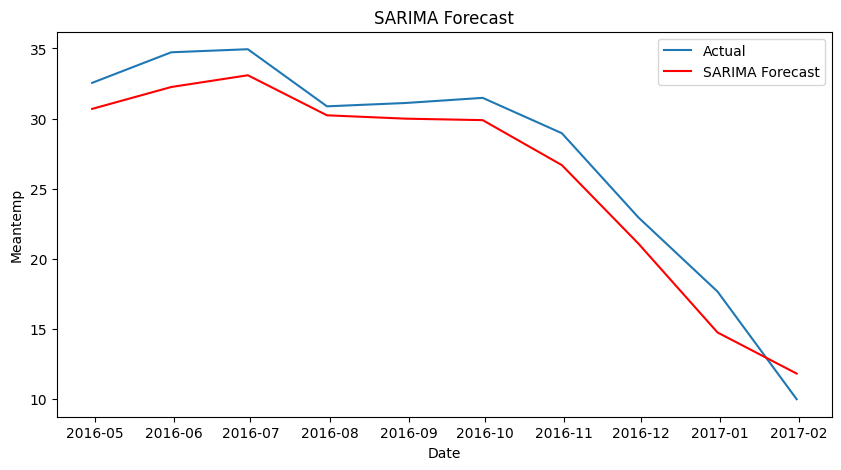

In [209]:
# SARIMA

from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the SARIMA model parameters
order = (1, 0, 0)  # Non-seasonal order (p, d, q)
seasonal_order = (2, 1, 1, 12)  # Seasonal order (P, D, Q, S)

# Fit the SARIMA model
sarima_model = SARIMAX(endog=train_data['meantemp'], exog=train_data[['humidity', 'wind_speed']],
                       order=order, seasonal_order=seasonal_order)
sarima_model_fit = sarima_model.fit()

# Make predictions
sarima_pred_m = sarima_model_fit.predict(start=test_data.index[0], end=test_data.index[-1],
                                            exog=test_data[['humidity', 'wind_speed']])

residuals = test_data['meantemp'] - sarima_pred_m

# Calculate error
mape_sarima_monthly = mean_absolute_percentage_error(test_data['meantemp'], sarima_pred_m)
rmse_sarima_monthly = math.sqrt(mean_squared_error(test_data['meantemp'], sarima_pred_m))
r2_sarima_monthly = r2_score(test_data['meantemp'], sarima_pred_m)
print('Test MAPE: %.3f' % mape_sarima_monthly)
print('Test RMSE: %.3f' % rmse_sarima_monthly)
print('Test R2: %.3f' % r2_sarima_monthly)

# Plot the results
plt.figure(figsize=(10, 5))
plt.style.use('default')
plt.plot(test_data.index, test_data['meantemp'], label='Actual')
plt.plot(test_data.index, sarima_pred_m, color='red', label='SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Meantemp')
plt.title('SARIMA Forecast')
plt.legend()
plt.show()

PROPHET MODEL

In [181]:
df_prop = df[['meantemp','humidity', 'wind_speed']]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuk1myx_v/byi4i2gz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuk1myx_v/_uv4m8d7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73430', 'data', 'file=/tmp/tmpuk1myx_v/byi4i2gz.json', 'init=/tmp/tmpuk1myx_v/_uv4m8d7.json', 'output', 'file=/tmp/tmpuk1myx_v/prophet_modelf2jl6etv/prophet_model-20250119025505.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:55:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:55:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Test MAPE: 0.050
Test RMSE: 1.666
Test R2: 0.913


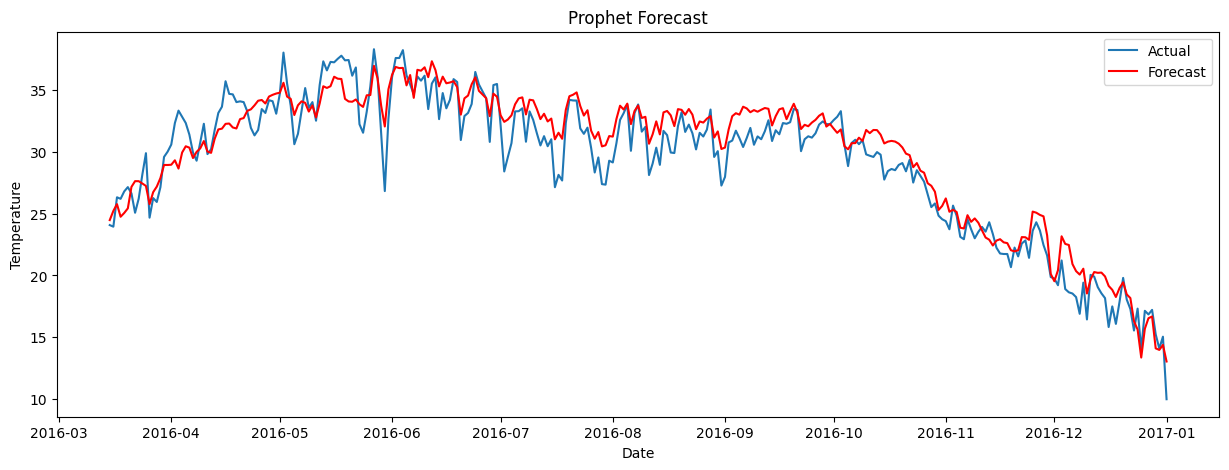

In [182]:
from os import P_ALL
from prophet import Prophet
# Rename columns for Prophet
df_prophet = df_prop.reset_index().rename(columns={'date': 'ds', 'meantemp': 'y'})

# Add additional features
df_prophet['humidity'] = df['humidity'].values
df_prophet['wind_speed'] = df['wind_speed'].values

# Split the data into training and testing sets
train_size = int(len(df_prophet) * 0.8)
p_train, p_test = df_prophet.iloc[:train_size], df_prophet.iloc[train_size:]


# Initialize and fit the Prophet model with additional features
prop_model = Prophet()
prop_model.add_regressor('humidity')
prop_model.add_regressor('wind_speed')

prop_model.fit(p_train)


# Make future dataframe and include additional features
future = prop_model.make_future_dataframe(periods=len(p_test), freq='D')
future['humidity'] = df['humidity'].values
future['wind_speed'] = df['wind_speed'].values

# Make predictions
forecast = prop_model.predict(future)

# Extract the forecasted values for the test period
predicted = forecast[['ds', 'yhat']].set_index('ds').loc[p_test['ds']]



# Calculate error and R²
mape_prophet = mean_absolute_percentage_error(p_test['y'], predicted['yhat'])
rmse_prophet = math.sqrt(mean_squared_error(p_test['y'], predicted['yhat']))
r2_prophet = r2_score(p_test['y'], predicted['yhat'])
print('Test MAPE: %.3f' % mape_prophet)
print('Test RMSE: %.3f' % rmse_prophet)
print('Test R2: %.3f' % r2_prophet)

# Plot the results
plt.figure(figsize=(15, 5))
plt.plot(p_test['ds'], p_test['y'], label='Actual')
plt.plot(predicted.index, predicted['yhat'], color='red', label='Forecast')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Prophet Forecast')
plt.legend()
plt.show()

In [183]:
p_test

,ds,y,humidity,wind_speed
1169,2016-03-15,24.066667,58.933333,8.646667
1170,2016-03-16,23.937500,53.750000,10.881250
1171,2016-03-17,26.312500,50.312500,6.843750
1172,2016-03-18,26.187500,61.250000,6.712500
1173,2016-03-19,26.785714,61.857143,3.578571
...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826
1458,2016-12-29,15.238095,87.857143,6.000000
1459,2016-12-30,14.095238,89.666667,6.266667
1460,2016-12-31,15.052632,87.000000,7.325000


In [184]:
display(df_prophet.head())
display(p_test.head())
display(predicted.head())

,ds,y,humidity,wind_speed
0,2013-01-01,10.000000,84.500000,0.000000
1,2013-01-02,7.400000,92.000000,2.980000
2,2013-01-03,7.166667,87.000000,4.633333
3,2013-01-04,8.666667,71.333333,1.233333
4,2013-01-05,6.000000,86.833333,3.700000


,ds,y,humidity,wind_speed
1169,2016-03-15,24.066667,58.933333,8.646667
1170,2016-03-16,23.937500,53.750000,10.881250
1171,2016-03-17,26.312500,50.312500,6.843750
1172,2016-03-18,26.187500,61.250000,6.712500
1173,2016-03-19,26.785714,61.857143,3.578571


,yhat
ds,
2016-03-15,24.469294
2016-03-16,25.210465
2016-03-17,25.757521
2016-03-18,24.739518
2016-03-19,25.044898


In [185]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,...,wind_speed,wind_speed_lower,wind_speed_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,23.821519,8.179990,12.486941,23.821519,23.821519,-13.498379,-13.498379,-13.498379,-2.373248,...,0.249779,0.249779,0.249779,-11.185364,-11.185364,-11.185364,0.0,0.0,0.0,10.323140
1,2013-01-02,23.830019,7.220160,11.619914,23.830019,23.830019,-14.349627,-14.349627,-14.349627,-3.355047,...,0.137028,0.137028,0.137028,-11.095261,-11.095261,-11.095261,0.0,0.0,0.0,9.480392
2,2013-01-03,23.838518,7.767011,12.235544,23.838518,23.838518,-13.913399,-13.913399,-13.913399,-2.838238,...,0.074472,0.074472,0.074472,-10.988531,-10.988531,-10.988531,0.0,0.0,0.0,9.925119
3,2013-01-04,23.847017,9.878558,14.141574,23.847017,23.847017,-11.785437,-11.785437,-11.785437,-0.894252,...,0.203115,0.203115,0.203115,-10.868452,-10.868452,-10.868452,0.0,0.0,0.0,12.061580
4,2013-01-05,23.855516,8.442665,12.564481,23.855516,23.855516,-13.463896,-13.463896,-13.463896,-2.783612,...,0.109786,0.109786,0.109786,-10.738408,-10.738408,-10.738408,0.0,0.0,0.0,10.391620


In [186]:
forecast['actual_temp'] = df_prophet['y']
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,...,wind_speed_lower,wind_speed_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,actual_temp
0,2013-01-01,23.821519,8.179990,12.486941,23.821519,23.821519,-13.498379,-13.498379,-13.498379,-2.373248,...,0.249779,0.249779,-11.185364,-11.185364,-11.185364,0.0,0.0,0.0,10.323140,10.000000
1,2013-01-02,23.830019,7.220160,11.619914,23.830019,23.830019,-14.349627,-14.349627,-14.349627,-3.355047,...,0.137028,0.137028,-11.095261,-11.095261,-11.095261,0.0,0.0,0.0,9.480392,7.400000
2,2013-01-03,23.838518,7.767011,12.235544,23.838518,23.838518,-13.913399,-13.913399,-13.913399,-2.838238,...,0.074472,0.074472,-10.988531,-10.988531,-10.988531,0.0,0.0,0.0,9.925119,7.166667
3,2013-01-04,23.847017,9.878558,14.141574,23.847017,23.847017,-11.785437,-11.785437,-11.785437,-0.894252,...,0.203115,0.203115,-10.868452,-10.868452,-10.868452,0.0,0.0,0.0,12.061580,8.666667
4,2013-01-05,23.855516,8.442665,12.564481,23.855516,23.855516,-13.463896,-13.463896,-13.463896,-2.783612,...,0.109786,0.109786,-10.738408,-10.738408,-10.738408,0.0,0.0,0.0,10.391620,6.000000


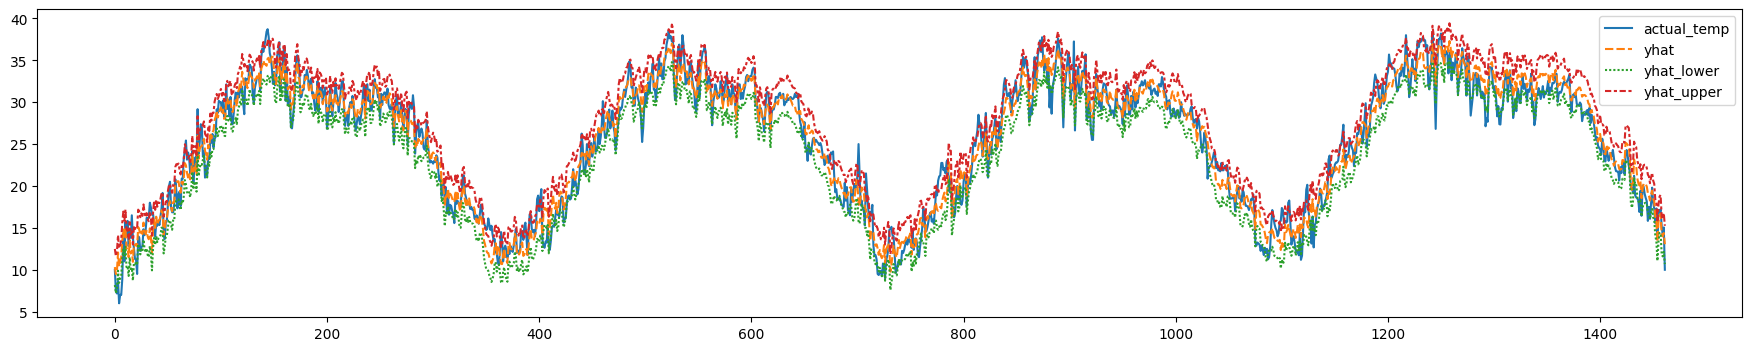

In [187]:
plt.figure(figsize=(22,4))
sns.lineplot(data = forecast[['actual_temp', 'yhat', 'yhat_lower','yhat_upper']]);

In [188]:
from prophet.plot import plot_plotly
import plotly.offline as py

plot_plotly(prop_model, forecast)

# black -> actual
# blue -> predicted

COMAPRISON Prophet Arima-Sarima

In [233]:
comapre_df = {
    'Prophet Daily': [mape_prophet, rmse_prophet, r2_prophet],
    'ARIMA Monthly': [mape_arima_monthly, rmse_arima_monthly, r2_arima_monthly],
    'SARIMA Monthly': [mape_sarima_monthly, rmse_sarima_monthly, r2_sarima_monthly]
}

compare_df = pd.DataFrame(comapre_df, index=['MAE', 'RMSE', 'R2'])
compare_df

,Prophet Daily,ARIMA Monthly,SARIMA Monthly
MAE,0.050203,0.339285,0.079595
RMSE,1.665776,8.034104,1.941149
R2,0.913324,-0.077362,0.937107


In [190]:
df

,meantemp,humidity,wind_speed,meanpressure,year,month,day,dayofweek,date
date,,,,,,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667,2013,1,1,1,2013-01-01
2013-01-02,7.400000,92.000000,2.980000,1017.800000,2013,1,2,2,2013-01-02
2013-01-03,7.166667,87.000000,4.633333,1018.666667,2013,1,3,3,2013-01-03
2013-01-04,8.666667,71.333333,1.233333,1017.166667,2013,1,4,4,2013-01-04
2013-01-05,6.000000,86.833333,3.700000,1016.500000,2013,1,5,5,2013-01-05
...,...,...,...,...,...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217,2016,12,28,2,2016-12-28
2016-12-29,15.238095,87.857143,6.000000,1016.904762,2016,12,29,3,2016-12-29
2016-12-30,14.095238,89.666667,6.266667,1017.904762,2016,12,30,4,2016-12-30


CREATING A NEW DAAT FRAME FOR DEEP LEARNING

In [191]:
df_dl = df[['meantemp','humidity','wind_speed']]
df_dl

,meantemp,humidity,wind_speed
date,,,
2013-01-01,10.000000,84.500000,0.000000
2013-01-02,7.400000,92.000000,2.980000
2013-01-03,7.166667,87.000000,4.633333
2013-01-04,8.666667,71.333333,1.233333
2013-01-05,6.000000,86.833333,3.700000
...,...,...,...
2016-12-28,17.217391,68.043478,3.547826
2016-12-29,15.238095,87.857143,6.000000
2016-12-30,14.095238,89.666667,6.266667


In [192]:
#split the training and testing data
train_size = int(len(df_dl)*0.8)
dl_train, dl_test = df_dl.iloc[:train_size], df_dl.iloc[train_size:]
print(dl_train.shape, dl_test.shape)

(1169, 3) (293, 3)


In [193]:
#scaling the parameters
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
minmax_scaler = MinMaxScaler()
robust_scaler = RobustScaler()
dl_train['humidity'] = minmax_scaler.fit_transform(dl_train[['humidity']])
dl_test['humidity'] = minmax_scaler.transform(dl_test[['humidity']])
dl_train['meantemp'] = minmax_scaler.fit_transform(dl_train[['meantemp']])
dl_test['meantemp'] = minmax_scaler.transform(dl_test[['meantemp']])
dl_train['wind_speed'] = robust_scaler.fit_transform(dl_train[['wind_speed']])
dl_test['wind_speed'] = robust_scaler.transform(dl_test[['wind_speed']])

In [194]:
dl_train.head()

,meantemp,humidity,wind_speed
date,,,
2013-01-01,0.122271,0.840372,-1.017818
2013-01-02,0.042795,0.929054,-0.496155
2013-01-03,0.035662,0.869932,-0.206731
2013-01-04,0.081514,0.684685,-0.801917
2013-01-05,0.000000,0.867962,-0.370116


In [195]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import SimpleRNN, Dense, LSTM, MultiHeadAttention, Add, Input, Dropout, LayerNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [196]:
def create_dataset(X, y, time_steps=1):
  Xs, ys = [],[]
  for i in range(len(X) - time_steps):
    v=X.iloc[i:(i + time_steps)].values
    Xs.append(v)
    ys.append(y.iloc[i + time_steps])
  return np.array(Xs), np.array(ys)

In [197]:
# Create sequences
sequence_length = 3  # Example sequence length (adjust based on your data and experimentation)
X_train, y_train = create_dataset(dl_train, dl_train['meantemp'], sequence_length)
X_test, y_test = create_dataset(dl_test, dl_test['meantemp'], sequence_length)

In [198]:
# Build the model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(100, activation='tanh', input_shape=(sequence_length, X_train.shape[2])))
rnn_model.add(Dense(1))
rnn_model.compile(optimizer='adam', loss='mse')

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = rnn_model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), batch_size=1, callbacks=[early_stopping])

# Evaluate the model
loss = rnn_model.evaluate(X_test, y_test)
print(f'Validation Loss: {loss}')


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1166/1166 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0289 - val_loss: 0.0055
Epoch 2/30
1166/1166 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0076 - val_loss: 0.0047
Epoch 3/30
1166/1166 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0047 - val_loss: 0.0038
Epoch 4/30
1166/1166 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0073 - val_loss: 0.0038
Epoch 5/30
1166/1166 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0034 - val_loss: 0.0033
Epoch 6/30
1166/1166 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0038 - val_loss: 0.0026
Epoch 7/30
1166/1166 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0033 - val_loss: 0.0035
Epoch 8/30
1166/1166 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0038 - val_loss: 0.0032
Epoch 9/30
1166/1166 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0030 - val_loss: 0.0033
Epoch 10/30
1166/1166 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0037 - val_loss: 0.0032
Epoch 11/30
1166/1166 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0033 - val_loss: 0.0029
Epoch 12/30
1166/1166 ━━━━━━━━━━━━━━━━━━━

In [199]:
#make predictions
rnn_pred = rnn_model.predict(X_test)
rnn_pred = minmax_scaler.inverse_transform(rnn_pred)  # Inverse transform to original scale

# Inverse transform the true values for comparison
y_test = y_test.reshape(-1, 1)
y_test = minmax_scaler.inverse_transform(y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [200]:
rmse_rnn =math.sqrt(mean_squared_error(y_test, rnn_pred))
mape_rnn = mean_absolute_percentage_error(y_test, rnn_pred)
r2_rnn = r2_score(y_test, rnn_pred)
print(f'Test MAPE: {mape_rnn}')
print(f'Test RMSE: {rmse_rnn}')
print(f'Test R2: {r2_rnn}')

Test MAPE: 0.0471986236892092
Test RMSE: 1.6524286865599687
Test R2: 0.9150016246612892


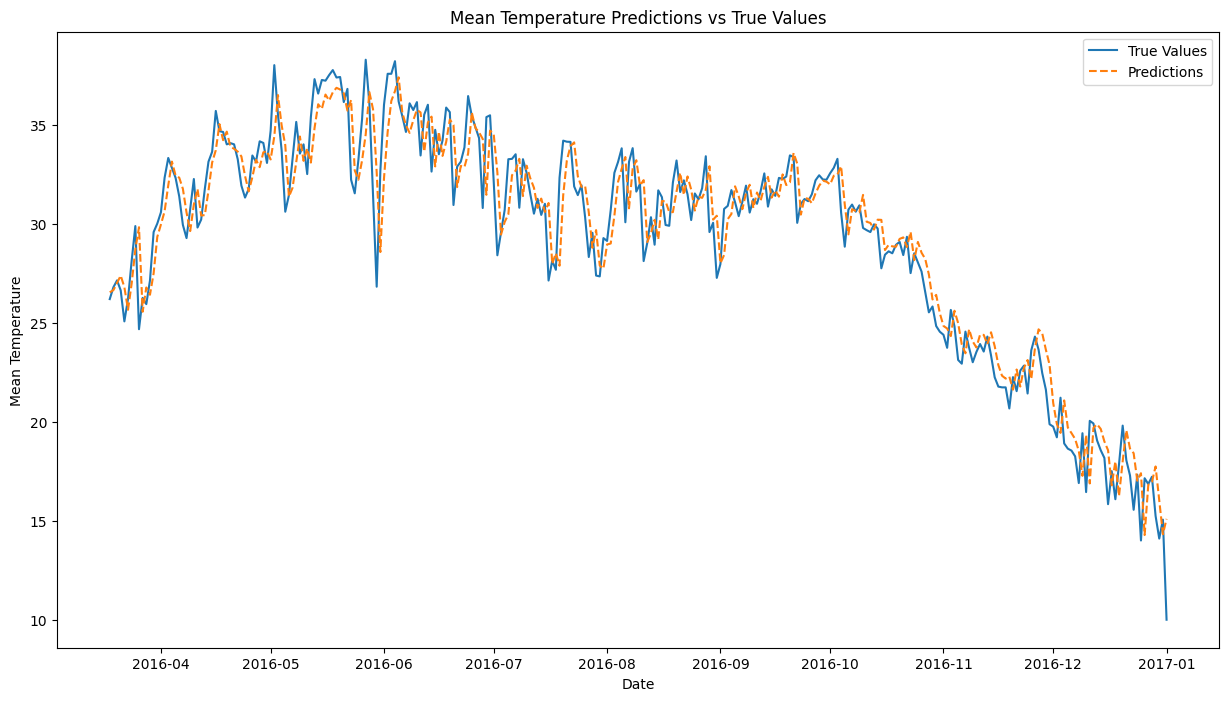

In [201]:
plt.figure(figsize=(15, 8))
plt.plot(df.index[-len(y_test):], y_test, label='True Values')
plt.plot(df.index[-len(y_test):], rnn_pred, label='Predictions', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('Mean Temperature Predictions vs True Values')
plt.legend()
plt.show()

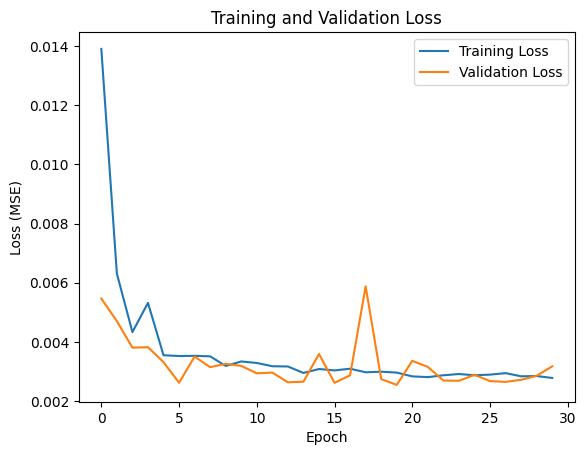

In [202]:
# Get training and validation losses from history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plot loss values over epochs
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

LSTM MODEL

In [203]:
sequence_length = 3  # Example sequence length (adjust based on your data and experimentation)
X_train, y_train = create_dataset(dl_train, dl_train['meantemp'], sequence_length)
X_test, y_test = create_dataset(dl_test, dl_test['meantemp'], sequence_length)

In [204]:
# Build the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(100, activation='tanh', input_shape=(sequence_length, X_train.shape[2])))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = lstm_model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), batch_size=1, callbacks=[early_stopping])

# Evaluate the model
loss = lstm_model.evaluate(X_test, y_test)
print(f'Validation Loss: {loss}')

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1166/1166 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0347 - val_loss: 0.0037
Epoch 2/30
1166/1166 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0042 - val_loss: 0.0043
Epoch 3/30
1166/1166 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0038 - val_loss: 0.0040
Epoch 4/30
1166/1166 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0038 - val_loss: 0.0034
Epoch 5/30
1166/1166 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0033 - val_loss: 0.0030
Epoch 6/30
1166/1166 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0034 - val_loss: 0.0028
Epoch 7/30
1166/1166 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0029 - val_loss: 0.0027
Epoch 8/30
1166/1166 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0030 - val_loss: 0.0027
Epoch 9/30
1166/1166 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0031 - val_loss: 0.0031
Epoch 10/30
1166/1166 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0029 - val_loss: 0.0034
Epoch 11/30
1166/1166 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0029 - val_loss: 0.0027
Epoch 12/30
1166/1166 ━━━━━━━━━━━━━━━━━━━

In [205]:
# Make predictions
lstm_pred = lstm_model.predict(X_test)
lstm_pred = minmax_scaler.inverse_transform(lstm_pred)  # Inverse transform to original scale

# Inverse transform the true values for comparison
y_test = y_test.reshape(-1, 1)
y_test = minmax_scaler.inverse_transform(y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [206]:
rmse_lstm =math.sqrt(mean_squared_error(y_test, lstm_pred))
mape_lstm = mean_absolute_percentage_error(y_test, lstm_pred)
r2_lstm = r2_score(y_test, lstm_pred)
print(f'Test MAPE: {mape_lstm}')
print(f'Test RMSE: {rmse_lstm}')
print(f'Test R2: {r2_lstm}')

Test MAPE: 0.04575984546644504
Test RMSE: 1.629444932093213
Test R2: 0.917349678222531


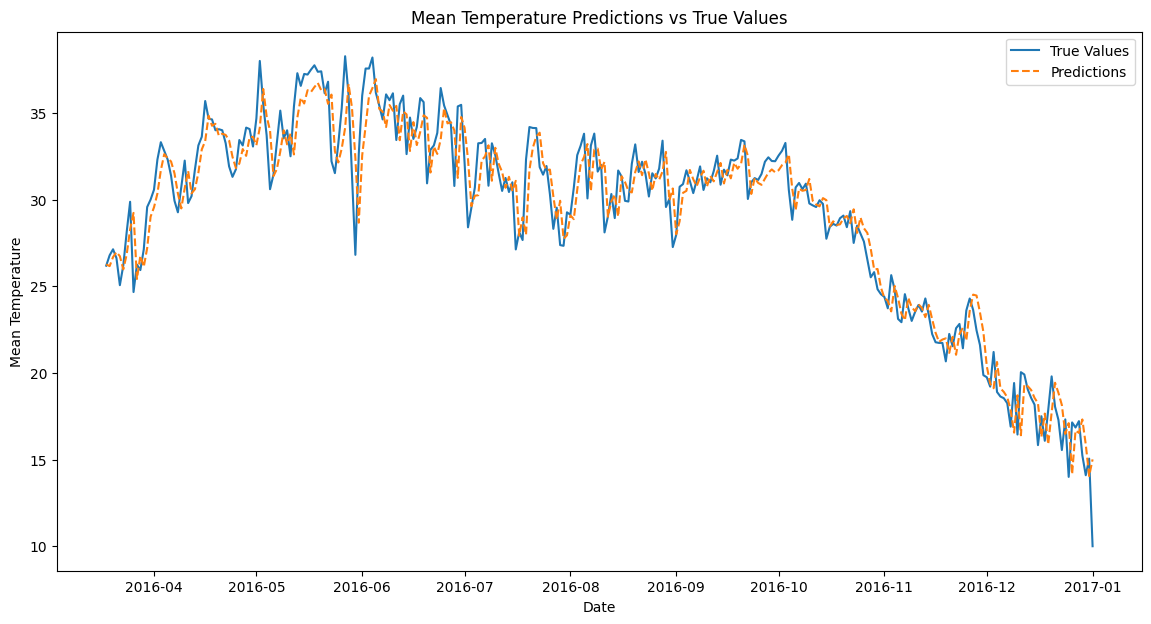

In [207]:
plt.figure(figsize=(14, 7))
plt.plot(df.index[-len(y_test):], y_test, label='True Values')
plt.plot(df.index[-len(y_test):], lstm_pred, label='Predictions', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('Mean Temperature Predictions vs True Values')
plt.legend()
plt.show()

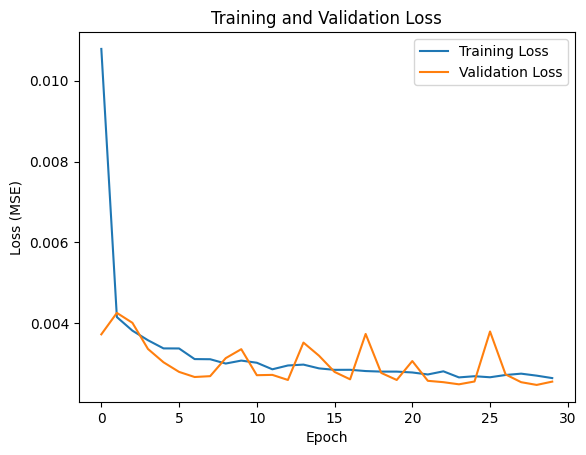

In [208]:
# Get training and validation losses from history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plot loss values over epochs
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [234]:
dl_compare = {
    'LSTM': [mape_lstm, rmse_lstm, r2_lstm],
    'RNN': [mape_rnn, rmse_rnn, r2_rnn]
    }

dl_compare = pd.DataFrame(dl_compare,index=['MAE','RMSE','R2'])
dl_compare

,LSTM,RNN
MAE,0.045760,0.047199
RMSE,1.629445,1.652429
R2,0.917350,0.915002


In [235]:
compare_models_df = pd.concat([compare_df, dl_compare], axis=1)
compare_models_df

,Prophet Daily,ARIMA Monthly,SARIMA Monthly,LSTM,RNN
MAE,0.050203,0.339285,0.079595,0.045760,0.047199
RMSE,1.665776,8.034104,1.941149,1.629445,1.652429
R2,0.913324,-0.077362,0.937107,0.917350,0.915002
